<center>
<font size=6px><b>
Challenge Set 4<br>
<font size=4px>
Linear Learning
</font>
</center>

### Challenge 1
__Step 1:__  Generate data that is linearly related to log(x)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np

In [281]:
df = pd.DataFrame()
B0 = 2.25
B1 = .5
df['x']= range(1, 101)
df['eps'] = np.random.normal(0, 0.2, size = 100)
df['logx'] = df.x.apply(np.log)
df['Y'] = B0 + B1*df['x'].apply(np.log) + df['eps']

In [282]:
df.head()

,x,eps,logx,Y
0,1,0.055457,0.000000,2.305457
1,2,0.463565,0.693147,3.060138
2,3,0.147796,1.098612,2.947102
3,4,-0.216442,1.386294,2.726705
4,5,-0.228678,1.609438,2.826041


__Step 2:__ Visualize x against Y

In [283]:
import seaborn as sns

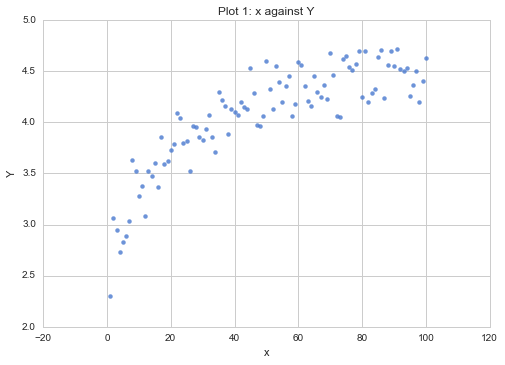

In [284]:
sns.set()
sns.set_palette("muted")
sns.set_style("whitegrid")
p1 = sns.regplot("x", "Y", data=df, fit_reg=False)
p1 = p1.set(title='Plot 1: x against Y')

__Step 3:__  Fit two models (quadratic, logarithmic) to the data

In [285]:
import statsmodels.formula.api as sm

__3(a):__ Quadratic Model (second degree polynomial)

In [341]:
model = sm.ols("Y ~ np.power(x, 2)", df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 27 Jul 2016   Prob (F-statistic):           1.05e-16
Time:                        16:50:00   Log-Likelihood:                -37.402
No. Observations:                 100   AIC:                             78.80
Df Residuals:                      98   BIC:                             84.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          3.6698      0.053     68.644      0.000         3.564     3.776
np.power(x, 2)     0.0001   1.18e-05     10.028      0.000       9.5e-05     0.000
==============================================================================
Omnibus:                       21.672   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.347
Skew:                          -1.056   Prob(JB):                     4.24e-07
Kurtosis:                       4.606   Cond. No.                     6.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Step 3(b):__ Logarithmic Model (log x)

In [335]:
model2 = sm.ols("Y ~ logx", df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     578.5
Date:                Wed, 27 Jul 2016   Prob (F-statistic):           6.68e-43
Time:                        16:49:24   Log-Likelihood:                 23.892
No. Observations:                 100   AIC:                            -43.78
Df Residuals:                      98   BIC:                            -38.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2468      0.078     28.721      0.000         2.092     2.402
logx           0.5014      0.021     24.052      0.000         0.460     0.543
==============================================================================
Omnibus:                        2.615   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                1.765
Skew:                           0.094   Prob(JB):                        0.414
Kurtosis:                       2.377   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

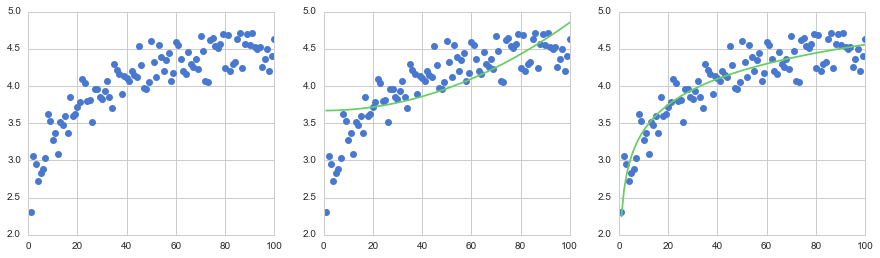

In [349]:
df.plot("x", "Y", marker='o', figsize=(15,4))
plt.subplot(131)
p2 = plt.plot(df.x, df.Y, 'o')
plt.subplot(132)
plt.plot(df.x, df.Y, 'o')
plt.plot(df.x, results.predict(), '-')
plt.subplot(133)
plt.plot(df.x, df.Y, 'o')
plt.plot(df.x, results2.predict(), '-')

## Challenge 2
__Step 1:__  Generate data from a model of the form *(B0 + B1•x + B2•x^2 + epsilon)*

In [388]:
df2 = pd.DataFrame()
B0 = 1.
B1 = 2.
B2 = 4.
df2['x'] = np.random.normal(50, 10, 100)
df2['eps'] = np.random.normal(50, 10, 100)
df2['x^2'] = df2.x.apply(lambda x: x**2)
df2['Y'] = B0 + B1*df2.x + B2*df2['x'].apply(lambda x: x**2) + df2['eps']

In [389]:
df2.head()

,x,eps,x^2,Y
0,57.743835,64.688117,3334.350504,13518.577803
1,43.645116,30.944556,1904.896159,7738.819426
2,43.776376,48.037876,1916.371056,7802.074851
3,62.511210,59.253725,3907.651321,15815.881430
4,44.195082,59.752613,1953.205294,7961.963953


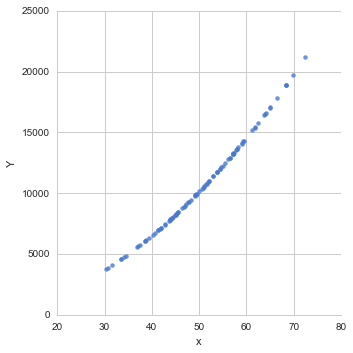

In [390]:
sns.lmplot("x", "Y", fit_reg=False, data=df2)

Split the data into a training and test set

In [117]:
from sklearn.cross_validation import train_test_split